In [126]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
### Установка кастомных параметров

import matplotlib.pyplot as plt

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

### Задача сегментации учащихся

Сюжет: оценки учеников делятся на 4 сегмента: 2/3/4/5

В зависимости от принадлежности к той или иной группе, учащиеся относятся к разным группам риска

Задача - множественная классификация!

In [417]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 500

In [419]:
df = pd.read_csv('all_classes.csv', index_col=0)
df.head(30)

,Student,Period,Gender,Class,Subject,Mark,Is_new_sub,Average_grade,Perform_trend
ID,,,,,,,,,
1,1,1,М,8,Алг.,3,1,3.89,0
2,1,2,М,8,Алг.,3,0,3.89,0
3,1,3,М,8,Алг.,3,0,3.89,0
4,1,4,М,8,Алг.,3,0,3.96,0
5,2,1,М,8,Алг.,3,1,3.39,0
6,2,2,М,8,Алг.,3,0,3.39,0
7,2,3,М,8,Алг.,3,0,3.42,0
8,2,4,М,8,Алг.,3,0,3.44,0
9,26,1,М,8,Алг.,2,1,3.61,0


**Описание колонок:**

1. **Student** - номер ученика
2. **Period** - четверти/полугодия
3. **Gender** - М/Ж
4. **Class** - 8/9/10/11
5. **Subject** - Предметы
6. **Mark** - Итоговая оценка 
7. **Is_new_sub** - новый ли это предмет
8. **Average_grade** - средняя оценка по всем предметам за все периоды до текущего
9. **Тренд** - как изменилась оценка по сравнению с предыдущим периодом

Наша целевая переменная - Mark.

### EDA

In [183]:
df['Gender'].value_counts()

Gender
Ж    2671
М    2348
Name: count, dtype: int64

In [185]:
df.shape

(5019, 9)

In [187]:
df.describe()

,Student,Period,Class,Mark,Is_new_sub,Average_grade,Perform_trend
count,5019.000000,5019.000000,5019.00000,5019.000000,5019.000000,5019.000000,5019.000000
mean,27.866707,1.963339,9.22634,4.020124,0.176529,4.008410,-0.000598
std,21.400943,0.975104,1.17219,0.768419,0.381308,0.398721,0.507614
min,1.000000,1.000000,8.00000,2.000000,0.000000,3.280000,-2.000000
25%,11.000000,1.000000,8.00000,3.000000,0.000000,3.720000,0.000000
50%,21.000000,2.000000,9.00000,4.000000,0.000000,4.000000,0.000000
75%,46.000000,3.000000,10.00000,5.000000,0.000000,4.310000,0.000000
max,73.000000,4.000000,11.00000,5.000000,1.000000,5.000000,2.000000


In [189]:
### Проверка на наличие пропусков

df.isna().sum()

Student          0
Period           0
Gender           0
Class            0
Subject          0
Mark             0
Is_new_sub       0
Average_grade    0
Perform_trend    0
dtype: int64

In [378]:
numeric_columns = df.drop('Mark', axis=1).loc[:, df.dtypes != object].columns
df.drop('Mark', axis=1).loc[:, df.dtypes != object].head(2)

,Student,Period,Class,Is_new_sub,Average_grade,Perform_trend,Gender_М,Subject_3,Subject_4,Subject_5
ID,,,,,,,,,,
1,1,1,8,1,3.89,0,True,0.655405,0.27027,0.060811
2,1,2,8,0,3.89,0,True,0.655405,0.27027,0.060811


In [193]:
### Корелляция вещественных признаков
df[numeric_columns].corr()

,Student,Period,Class,Mark,Is_new_sub,Average_grade,Perform_trend
Student,1.000000,-0.407315,0.742536,0.285595,0.124402,0.591130,-0.021599
Period,-0.407315,1.000000,-0.482312,-0.115773,-0.457463,-0.270753,0.038606
Class,0.742536,-0.482312,1.000000,0.270613,-0.133997,0.591202,-0.040633
Mark,0.285595,-0.115773,0.270613,1.000000,0.006917,0.509438,0.331095
Is_new_sub,0.124402,-0.457463,-0.133997,0.006917,1.000000,0.001558,0.000545
Average_grade,0.591130,-0.270753,0.591202,0.509438,0.001558,1.000000,-0.011328
Perform_trend,-0.021599,0.038606,-0.040633,0.331095,0.000545,-0.011328,1.000000


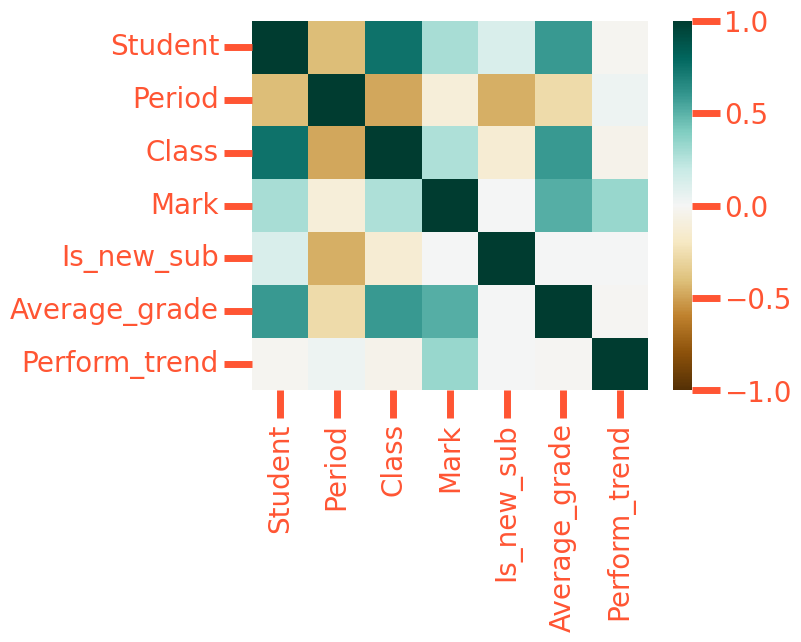

In [195]:
### Тепловая карты

import seaborn as sns

fig = plt.figure

sns.heatmap(df[numeric_columns].corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [197]:
### Фильтрация признаков

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
Student  Class            0.742536
Class    Average_grade    0.591202
Student  Average_grade    0.591130
Mark     Average_grade    0.509438
Period   Class            0.482312
         Is_new_sub       0.457463
Student  Period           0.407315
Mark     Perform_trend    0.331095
Student  Mark             0.285595
Period   Average_grade    0.270753
dtype: float64


In [199]:
### Квазиконстантые признаки

from sklearn.feature_selection import VarianceThreshold


cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])

cutter.get_feature_names_out()

array(['Student', 'Period', 'Class', 'Mark', 'Is_new_sub',
       'Average_grade', 'Perform_trend'], dtype=object)

In [203]:
categorical_columns = df.loc[:, df.dtypes == object].columns

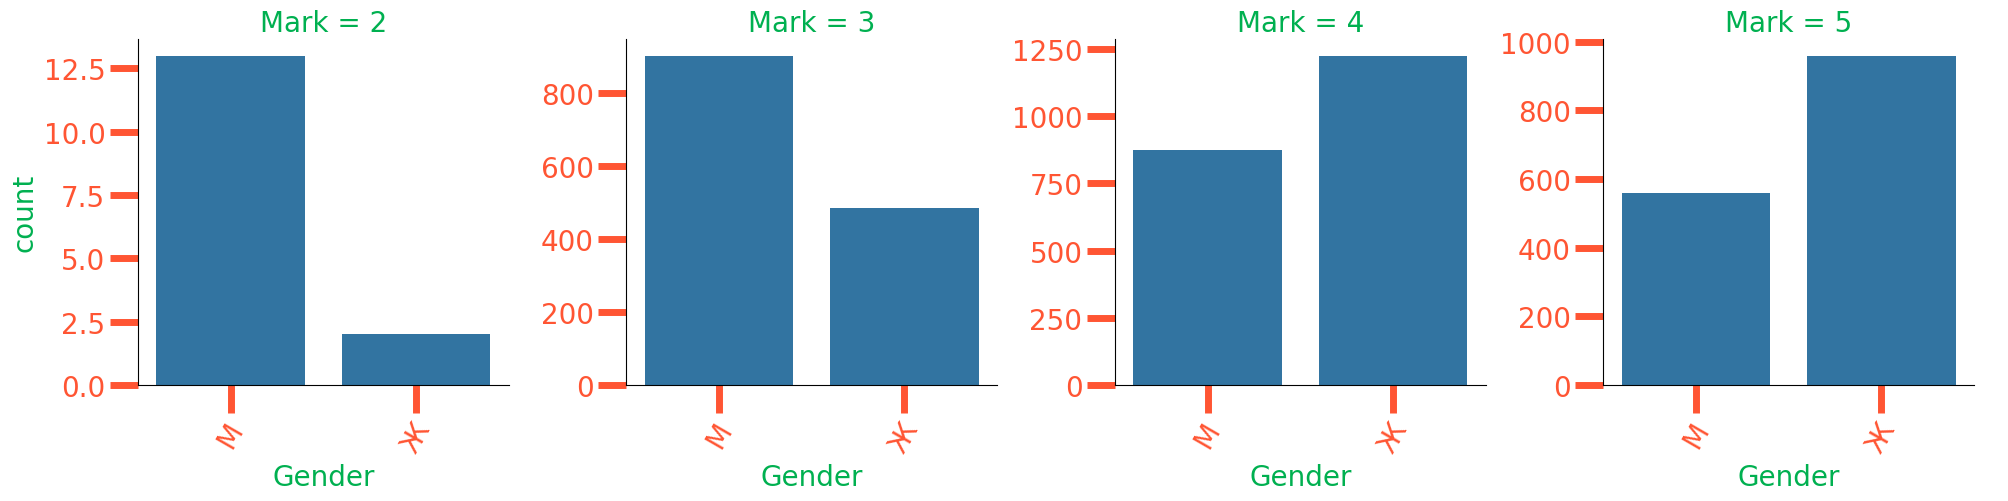

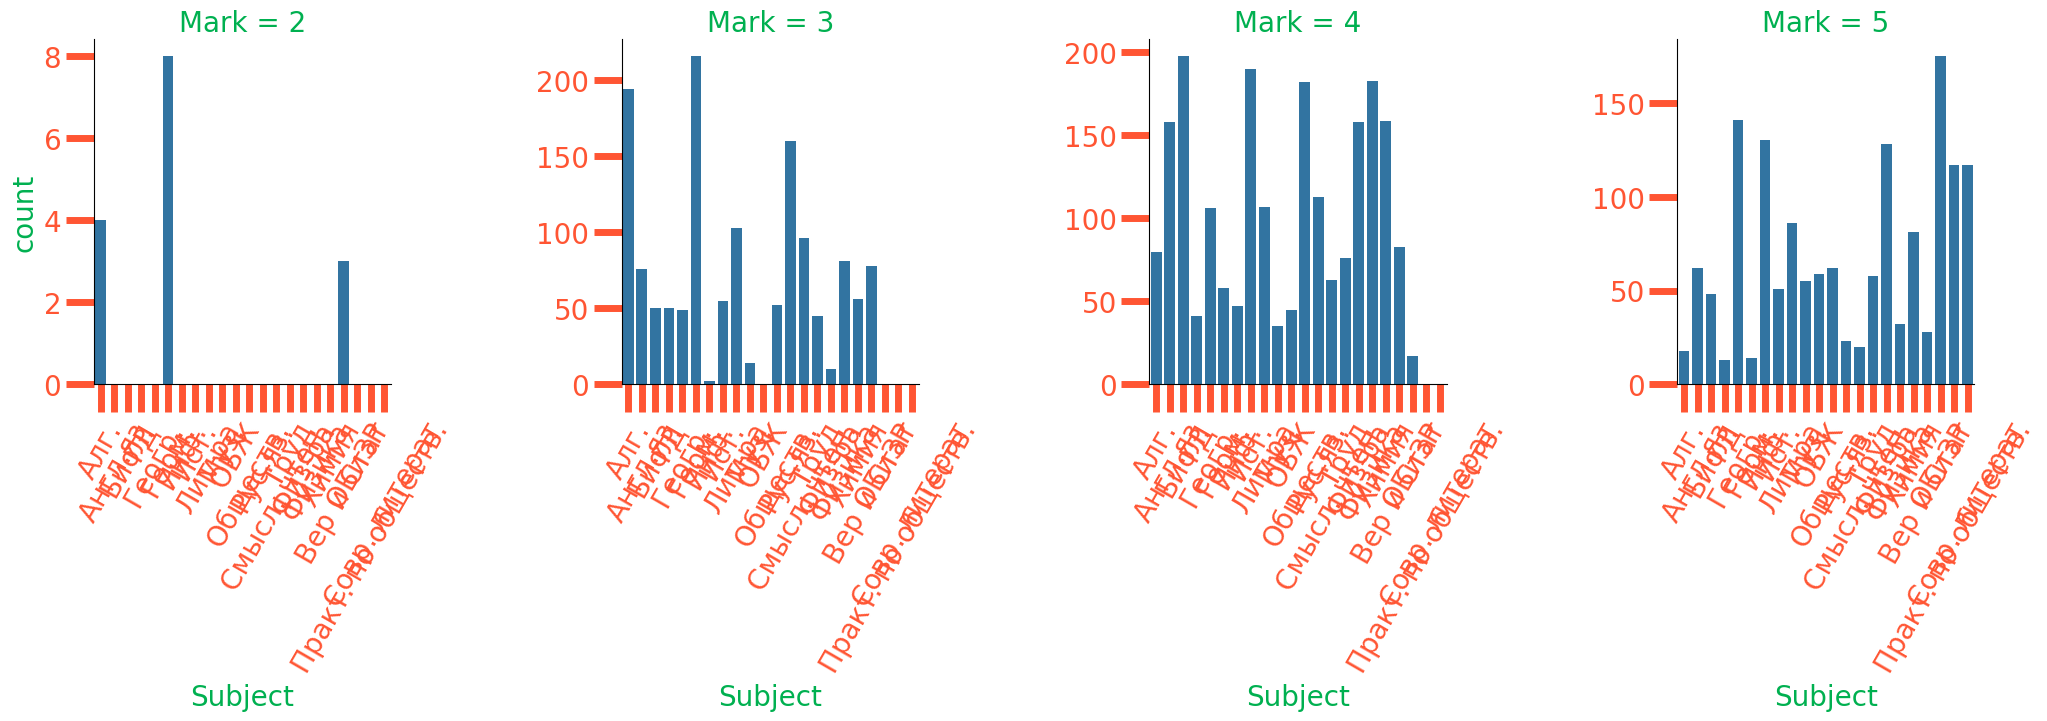

In [205]:
for col in categorical_columns: 
    if col != 'Mark':
        
        g = sns.catplot(x=col, kind='count', col='Mark', data=df, sharey=False)
        g.set_xticklabels(rotation=60)

### Encoding

In [311]:
df.describe(include='object')

,Gender,Subject
count,5019,5019
unique,2,22
top,Ж,Алг.
freq,2671,296


In [313]:
### mean encoding'а

def encode_multiclass_target(df, category, target='Mark'):
    df = df[[category, target]].copy()
    
    target_dummies = pd.get_dummies(df[target], 
                                    prefix=category, 
                                    drop_first=True)
    
    df = pd.concat((df, target_dummies), axis=1)
    
    for tg in target_dummies.columns:
        
        df[tg] = df.groupby(category)[tg].transform("mean")
    
    return df.drop(category, axis=1)

In [315]:
df.head()

,Student,Period,Gender,Class,Subject,Mark,Is_new_sub,Average_grade,Perform_trend
ID,,,,,,,,,
1,1,1,М,8,Алг.,3,1,3.89,0
2,1,2,М,8,Алг.,3,0,3.89,0
3,1,3,М,8,Алг.,3,0,3.89,0
4,1,4,М,8,Алг.,3,0,3.96,0
5,2,1,М,8,Алг.,3,1,3.39,0


In [317]:
categorical_columns

Index(['Gender', 'Subject'], dtype='object')

In [319]:
df['Subject'].nunique()

22

In [323]:
### Производим encoding
for col in categorical_columns:
    if df[col].nunique() < 4:
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)     
        df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)
        
    else:
        mean_target = encode_multiclass_target(df, col).drop("Mark", axis=1)
        df = pd.concat((df.drop(col, axis=1), mean_target), axis=1)

In [325]:
df.head()

,Student,Period,Class,Mark,Is_new_sub,Average_grade,Perform_trend,Gender_М,Subject_3,Subject_4,Subject_5
ID,,,,,,,,,,,
1,1,1,8,3,1,3.89,0,True,0.655405,0.27027,0.060811
2,1,2,8,3,0,3.89,0,True,0.655405,0.27027,0.060811
3,1,3,8,3,0,3.89,0,True,0.655405,0.27027,0.060811
4,1,4,8,3,0,3.96,0,True,0.655405,0.27027,0.060811
5,2,1,8,3,1,3.39,0,True,0.655405,0.27027,0.060811


In [327]:
df.shape

(5019, 11)

In [329]:
X = df.drop('Mark', axis=1)
Y = df['Mark']

In [331]:
Y.head()

ID
1    3
2    3
3    3
4    3
5    3
Name: Mark, dtype: int64

In [335]:
### Проверка баланса классов

Y.value_counts()

### не сбалансированы. пробую пока что оставить так

Mark
4    2099
5    1518
3    1387
2      15
Name: count, dtype: int64

### Попробуем подход one vs all!

данный подходит для сбалансированных классов, но ради инетереса решил попробовать

In [340]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    random_state=0, 
                                                    test_size=0.2)

In [342]:
from sklearn.multiclass import OneVsRestClassifier ### Один против всех
from sklearn.linear_model import SGDClassifier ### 

SGDClassifier(loss='log') ### max(0; 1-M)

pipe = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_all", OneVsRestClassifier(SGDClassifier()))])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all', OneVsRestClassifier(estimator=SGDClassifier()))])

In [348]:
print(pipe.classes_)

print(pipe.predict(X_test.head(1)))

print(pipe.decision_function(X_test.head(1)))

# print(pipe.predict_proba(X_test.head(1)))

[2 3 4 5]
[5]
[[-50.68165289  -2.31488196  -1.00271433   0.30091912]]


In [350]:
X_test.head(1)

,Student,Period,Class,Is_new_sub,Average_grade,Perform_trend,Gender_М,Subject_3,Subject_4,Subject_5
ID,,,,,,,,,,
972,8,4,8,0,3.76,0,False,0.134615,0.336538,0.528846


In [356]:
### Замерим accuracy

np.mean((pipe.predict(X_test) == Y_test)), np.mean((pipe.predict(X_train) == Y_train))

(0.7390438247011952, 0.7183063511830635)

In [358]:
### Переберем различные параметры базовых моделей

from sklearn.model_selection import GridSearchCV

param_grid = {
    'one_vs_all__estimator__loss': ['hinge', 'log', 'modified_huber',
                                    'squared_hinge', 'perceptron'],
    
    'one_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    
    'one_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

from sklearn.model_selection import PredefinedSplit

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)

search = GridSearchCV(pipe, param_grid, cv=ps)

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.76912):
{'one_vs_all__estimator__alpha': 0.01, 'one_vs_all__estimator__loss': 'modified_huber', 'one_vs_all__estimator__penalty': 'l2'}


### Попробуем подход all vs all!

In [362]:
from sklearn.multiclass import OneVsOneClassifier #### all vs all


pipe_all_all = Pipeline([("scaler", StandardScaler()),
                         ("all_vs_all", OneVsOneClassifier(SGDClassifier()))])

pipe_all_all.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('all_vs_all', OneVsOneClassifier(estimator=SGDClassifier()))])

In [364]:
print(pipe_all_all.classes_)

print(pipe_all_all.predict(X_test.head(1)))

[2 3 4 5]
[4]


In [366]:
### Переберем различные параметры базовых моделей

from sklearn.model_selection import GridSearchCV

param_grid = {
    'all_vs_all__estimator__loss': ['hinge', 'log', 'modified_huber', 
                                    'squared_hinge', 'perceptron'],
    
    'all_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    
    'all_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

from sklearn.model_selection import PredefinedSplit

search = GridSearchCV(pipe_all_all, param_grid, cv=ps)

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.78730):
{'all_vs_all__estimator__alpha': 0.01, 'all_vs_all__estimator__loss': 'hinge', 'all_vs_all__estimator__penalty': 'l2'}


In [380]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'all_vs_all__estimator__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'all_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'all_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

from sklearn.model_selection import PredefinedSplit

search = GridSearchCV(pipe_all_all, param_grid, cv=ps)

search.fit(X[numeric_columns], Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.78630):
{'all_vs_all__estimator__alpha': 0.01, 'all_vs_all__estimator__loss': 'hinge', 'all_vs_all__estimator__penalty': 'elasticnet'}


In [382]:
### Попробуем улучшить модель полиномиальными фичами

X_polinomial = X.copy()

for col in numeric_columns:
    for power in [2, 3, 4]:
        
        to_add = (X_polinomial[col]**power).to_frame().rename({col:f"{col}_{power}"}, axis=1)
        X_polinomial = pd.concat((X_polinomial, to_add), axis=1)

In [384]:
X_polinomial.head()

,Student,Period,Class,Is_new_sub,Average_grade,Perform_trend,Gender_М,Subject_3,Subject_4,Subject_5,Student_2,Student_3,Student_4,Period_2,Period_3,Period_4,Class_2,Class_3,Class_4,Is_new_sub_2,Is_new_sub_3,Is_new_sub_4,Average_grade_2,Average_grade_3,Average_grade_4,Perform_trend_2,Perform_trend_3,Perform_trend_4,Gender_М_2,Gender_М_3,Gender_М_4,Subject_3_2,Subject_3_3,Subject_3_4,Subject_4_2,Subject_4_3,Subject_4_4,Subject_5_2,Subject_5_3,Subject_5_4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,8,1,3.89,0,True,0.655405,0.27027,0.060811,1,1,1,1,1,1,64,512,4096,1,1,1,15.1321,58.863869,228.980450,0,0,0,1,1,1,0.429556,0.281533,0.184519,0.073046,0.019742,0.005336,0.003698,0.000225,0.000014
2,1,2,8,0,3.89,0,True,0.655405,0.27027,0.060811,1,1,1,4,8,16,64,512,4096,0,0,0,15.1321,58.863869,228.980450,0,0,0,1,1,1,0.429556,0.281533,0.184519,0.073046,0.019742,0.005336,0.003698,0.000225,0.000014
3,1,3,8,0,3.89,0,True,0.655405,0.27027,0.060811,1,1,1,9,27,81,64,512,4096,0,0,0,15.1321,58.863869,228.980450,0,0,0,1,1,1,0.429556,0.281533,0.184519,0.073046,0.019742,0.005336,0.003698,0.000225,0.000014
4,1,4,8,0,3.96,0,True,0.655405,0.27027,0.060811,1,1,1,16,64,256,64,512,4096,0,0,0,15.6816,62.099136,245.912579,0,0,0,1,1,1,0.429556,0.281533,0.184519,0.073046,0.019742,0.005336,0.003698,0.000225,0.000014
5,2,1,8,1,3.39,0,True,0.655405,0.27027,0.060811,4,8,16,1,1,1,64,512,4096,1,1,1,11.4921,38.958219,132.068362,0,0,0,1,1,1,0.429556,0.281533,0.184519,0.073046,0.019742,0.005336,0.003698,0.000225,0.000014


In [386]:
### Полиномиальные фичи

from sklearn.model_selection import GridSearchCV

param_grid = {
    'all_vs_all__estimator__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'all_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'all_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

from sklearn.model_selection import PredefinedSplit

search = GridSearchCV(pipe_all_all, param_grid, cv=ps)

search.fit(X_polinomial, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.79278):
{'all_vs_all__estimator__alpha': 0.01, 'all_vs_all__estimator__loss': 'hinge', 'all_vs_all__estimator__penalty': 'l1'}


In [387]:
### Макро метрика

from sklearn.metrics import precision_score, recall_score, f1_score


print(f"""Precision равно: {precision_score(Y_test, 
                                            pipe_all_all.predict(X_test), 
                                            average='macro'):.3f}""" )

print(f"""Recall равно: {recall_score(Y_test,
                                      pipe_all_all.predict(X_test),
                                      average='macro'):.3f}""" )

print(f"""F-мера равно: {f1_score(Y_test, 
                                  pipe_all_all.predict(X_test),
                                  average='macro'):.3f}""" )

Precision равно: 0.563
Recall равно: 0.560
F-мера равно: 0.559


In [390]:
### Микро метрика

from sklearn.metrics import precision_score, recall_score, f1_score

print(f"""Precision равно: {precision_score(Y_test, 
                                            pipe_all_all.predict(X_test), 
                                            average='micro'):.3f}""" )

print(f"""Recall равно: {recall_score(Y_test,
                                      pipe_all_all.predict(X_test),
                                      average='micro'):.3f}""" )

print(f"""F-мера равно: {f1_score(Y_test, 
                                  pipe_all_all.predict(X_test),
                                  average='micro'):.3f}""" )

Precision равно: 0.739
Recall равно: 0.739
F-мера равно: 0.739


### Сохранение модели

In [412]:
X_test.head()

,Student,Period,Class,Is_new_sub,Average_grade,Perform_trend,Gender_М,Subject_3,Subject_4,Subject_5
ID,,,,,,,,,,
972,8,4,8,0,3.76,0,False,0.134615,0.336538,0.528846
3708,65,1,11,0,4.34,0,False,0.165541,0.358108,0.476351
2709,4,3,9,0,3.89,1,False,0.540541,0.381757,0.077703
303,23,3,8,0,4.08,-2,False,0.168919,0.668919,0.162162
3806,59,2,10,0,4.00,0,True,0.729730,0.195946,0.047297


In [414]:
import joblib

joblib.dump(pipe, 'model_1.pkl')

['model_1.pkl']